# Problem 2

In [2]:
import nltk

In [3]:
nltk.__version__

'3.7'

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2. Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [4]:
import nltk
##nltk.download('inaugural')
from nltk.corpus import inaugural #Get Dataset
from nltk.tokenize import word_tokenize #Tokenize words
from nltk.tokenize import sent_tokenize #Tokenize Sentences
from collections import Counter #Frequent words

from nltk.corpus import stopwords #Get standard stopwords
# Download stopwords if not already downloaded
#nltk.download('stopwords')

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

import matplotlib.pyplot as plt #For Plots
from wordcloud import WordCloud
#--pip install wordcloud
import string # this is used for string manipulations

## Load Dataset

In [5]:
# Display the file ids of all the files available.
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [6]:
# Retrieve the raw text of the speeches
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

In [7]:
# Tokenize the speeches into words
roosevelt_words = inaugural.words('1941-Roosevelt.txt')
kennedy_words = inaugural.words('1961-Kennedy.txt')
nixon_words = inaugural.words('1973-Nixon.txt')

## Characters/Words/Sentences Count

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)
3

In [8]:
# Calculate the number of characters
roosevelt_chars_raw_count = len(roosevelt_speech)
kennedy_chars_raw_count = len(kennedy_speech)
nixon_chars_raw_count = len(nixon_speech)

In [9]:
# Calculate the number of words
roosevelt_words_raw_count = len(roosevelt_words)
kennedy_words_raw_count = len(kennedy_words)
nixon_words_raw_count = len(nixon_words)

In [10]:
# Calculate the number of sentences
roosevelt_sents_raw_count = len(inaugural.sents('1941-Roosevelt.txt'))
kennedy_sents_raw_count = len(inaugural.sents('1961-Kennedy.txt'))
nixon_sents_raw_count = len(inaugural.sents('1973-Nixon.txt'))

In [11]:
# Print the results
print("1941-Roosevelt.txt:")
print("No. of Characters:", roosevelt_chars_raw_count)
print("No. of Words:", roosevelt_words_raw_count)
print("No. of Sentences:", roosevelt_sents_raw_count)
print()

print("1961-Kennedy.txt:")
print("No. of Characters:", kennedy_chars_raw_count)
print("No. of Words:", kennedy_words_raw_count)
print("No. of Sentences:", kennedy_sents_raw_count)
print()

print("1973-Nixon.txt:")
print("No. of Characters:", nixon_chars_raw_count)
print("No. of Words:", nixon_words_raw_count)
print("No. of Sentences:", nixon_sents_raw_count)


1941-Roosevelt.txt:
No. of Characters: 7571
No. of Words: 1536
No. of Sentences: 68

1961-Kennedy.txt:
No. of Characters: 7618
No. of Words: 1546
No. of Sentences: 52

1973-Nixon.txt:
No. of Characters: 9991
No. of Words: 2028
No. of Sentences: 69


Sample Sentences:

In [12]:
print("Sample 3 sentences of Roosevelt's Speech:\n\n",sent_tokenize(roosevelt_speech)[:3])
print('\n')
print("Sample 3 sentences of Kennedy's Speech:\n\n",sent_tokenize(kennedy_speech)[:3])
print('\n')
print("Sample 3 sentences of Nixon's Speech:\n\n",sent_tokenize(nixon_speech)[:3])

Sample 3 sentences of Roosevelt's Speech:

 ['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.', "In Washington's day the task of the people was to create and weld together a nation.", "In Lincoln's day the task of the people was to preserve that Nation from disruption from within."]


Sample 3 sentences of Kennedy's Speech:

 ['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.', 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.', 'The world is very different now.']


Sample 3 sentences of Nixon's Speech:

 ['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, 

## Frequent words Bar plots

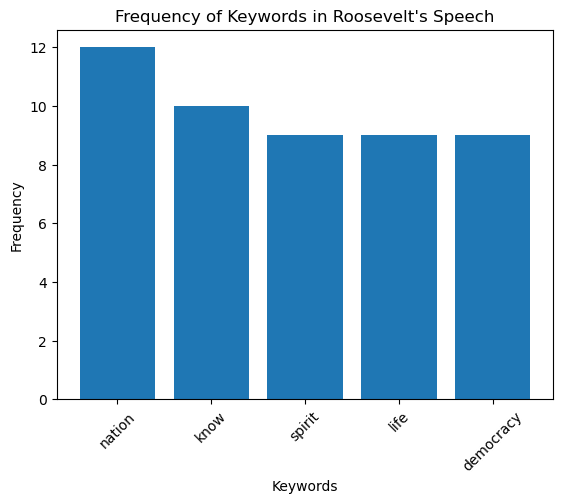

In [13]:
# Roosevelt speech
speech = roosevelt_speech

# Preprocess the text
tokens = word_tokenize(speech)
tokens = [token.lower() for token in tokens if token.isalpha()]  # Remove punctuation
tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords if needed

# Count the frequency of keywords/categories
keyword_freq = Counter(tokens)

# Sort the data by frequency
sorted_data = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 keywords and their frequencies
top_keywords = [item[0] for item in sorted_data[:5]]
top_frequencies = [item[1] for item in sorted_data[:5]]

# Plot the bar chart
plt.bar(top_keywords, top_frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title("Frequency of Keywords in Roosevelt's Speech")
plt.xticks(rotation=45)
plt.show()


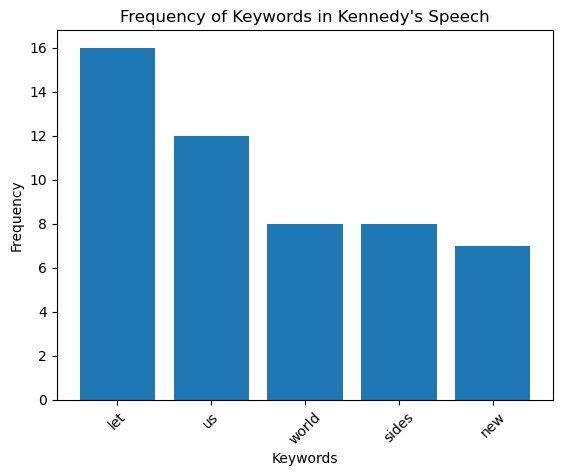

In [14]:
# Roosevelt speech
speech = kennedy_speech

# Preprocess the text
tokens = word_tokenize(speech)
tokens = [token.lower() for token in tokens if token.isalpha()]  # Remove punctuation
tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords if needed

# Count the frequency of keywords/categories
keyword_freq = Counter(tokens)

# Sort the data by frequency
sorted_data = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 keywords and their frequencies
top_keywords = [item[0] for item in sorted_data[:5]]
top_frequencies = [item[1] for item in sorted_data[:5]]

# Plot the bar chart
plt.bar(top_keywords, top_frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title("Frequency of Keywords in Kennedy's Speech")
plt.xticks(rotation=45)
plt.show()

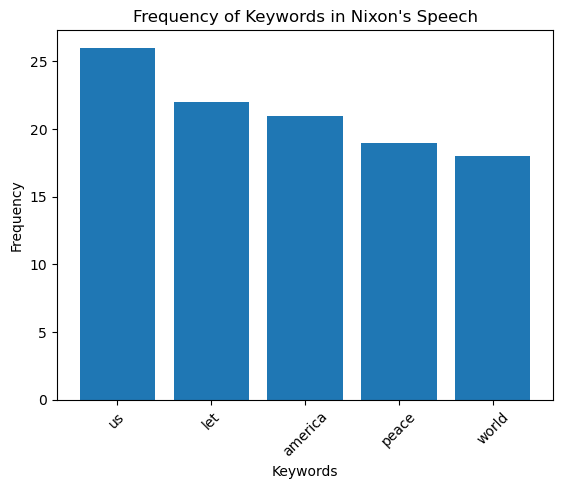

In [15]:
# Roosevelt speech
speech = nixon_speech

# Preprocess the text
tokens = word_tokenize(speech)
tokens = [token.lower() for token in tokens if token.isalpha()]  # Remove punctuation
tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords if needed

# Count the frequency of keywords/categories
keyword_freq = Counter(tokens)

# Sort the data by frequency
sorted_data = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 keywords and their frequencies
top_keywords = [item[0] for item in sorted_data[:5]]
top_frequencies = [item[1] for item in sorted_data[:5]]

# Plot the bar chart
plt.bar(top_keywords, top_frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title("Frequency of Keywords in Nixon's Speech")
plt.xticks(rotation=45)
plt.show()

## Stopwords
2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.
3

In [16]:
# Define the stopwords and punctuations to be removed
stopwords_set = set(stopwords.words('english'))
punctuations_set = set(string.punctuation) | set(['--', "``", "''"])
#punctuations_set = set(string.punctuation) | set(['--', "``", "''", '."', '-', '@'])#Add more punctuations as needed

In [17]:
#Convert words to lower & work with only alpha words.

roosevelt_words_lower = [word.lower() for word in roosevelt_words if word.isalpha()]
kennedy_words_lower = [word.lower() for word in kennedy_words if word.isalpha()]
nixon_words_lower = [word.lower() for word in nixon_words if word.isalpha()]
#nixon_words_lower = [word.lower() for word in nixon_words]

In [18]:
# Remove stopwords & punctuation from the words_lower

roosevelt_words_filtered = [word for word in roosevelt_words_lower if word not in stopwords_set and word not in punctuations_set]
kennedy_words_filtered = [word for word in kennedy_words_lower if word not in stopwords_set and word not in punctuations_set]
nixon_words_filtered = [word for word in nixon_words_lower if word not in stopwords_set and word not in punctuations_set]

In [19]:
# Find the total number of words after removing stopwords
roosevelt_words_total = len(roosevelt_words_filtered)
kennedy_words_total = len(kennedy_words_filtered)
nixon_words_total = len(nixon_words_filtered)

print("Roosevelt words count before and after removing stopwords are :",  roosevelt_words_raw_count, '&' , roosevelt_words_total, 'resepctively.')
print("Kennedy words count before and after removing stopwords are :", kennedy_words_raw_count , '&',kennedy_words_total,'resepctively.')
print("Nixon words count before and after removing stopwords are :", nixon_words_raw_count, '&', nixon_words_total,'resepctively.')

Roosevelt words count before and after removing stopwords are : 1536 & 627 resepctively.
Kennedy words count before and after removing stopwords are : 1546 & 692 resepctively.
Nixon words count before and after removing stopwords are : 2028 & 832 resepctively.


In [20]:
# Get a sample sentence after removing stopwords
sample_sentence_roosevelt = " ".join(roosevelt_words_filtered[:20])  # Taking first 20 words
sample_sentence_kennedy = " ".join(kennedy_words_filtered[:20])  # Taking first 20 words
sample_sentence_nixon = " ".join(nixon_words_filtered[:20])  # Taking first 20 words

# Print sample sentences
print("Sample sentence after removing stopwords (1941-Roosevelt.txt):")
print(sample_sentence_roosevelt)
print()

print("Sample sentence after removing stopwords (1961-Kennedy.txt):")
print(sample_sentence_kennedy)
print()

print("Sample sentence after removing stopwords (1973-Nixon.txt):")
print(sample_sentence_nixon)

Sample sentence after removing stopwords (1941-Roosevelt.txt):
national day inauguration since people renewed sense dedication united states washington day task people create weld together nation lincoln day

Sample sentence after removing stopwords (1961-Kennedy.txt):
vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe

Sample sentence after removing stopwords (1973-Nixon.txt):
mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met


## Lemmatization

In [21]:
# Lemmatize the words in roosevelt_words_filtered
roosevelt_words_lemmatized = [lmtzr.lemmatize(word) for word in roosevelt_words_filtered]
kennedy_words_lemmatized = [lmtzr.lemmatize(word) for word in kennedy_words_filtered]
nixon_words_lemmatized = [lmtzr.lemmatize(word) for word in nixon_words_filtered]

In [22]:
nixon_words_lemmatized

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mr',
 'eisenhower',
 'fellow',
 'citizen',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'year',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'u',
 'shall',
 'use',
 'peace',
 'let',
 'u',
 'resolve',
 'era',
 'enter',
 'postwar',
 'period',
 'often',
 'time',
 'retreat',
 'isolation',
 'lead',
 'stagnation',
 'home',
 'invite',
 'new',
 'danger',
 'abroad',
 'let',
 'u',
 'resolve',
 'become',
 'time',
 'great',
 'responsibility',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'result',
 'new',
 'policy',
 'peace',
 'continuing',
 'revitalize',

Inference: based on output, new approach is used.

Inerence:
    1. 'Us' does not have to be lemmatized as 'u' and a rule can be added to skip lemmatizing 'us', thus preserving the word. 
    2. Roman Numbers are used like II to indicate world war 2, these can be added to cleanup, since the frequency of such Roman Number is minute. it can be ignored for now.
    3. The verbs can be lemmatized to base form using 'pos_tag'.

## WordNet-compatible POS tags

In [23]:
lmtzr = WordNetLemmatizer()

In [24]:
roosevelt_words_lemmatized=[]

tagged_words = pos_tag(roosevelt_words_filtered)

for word, tag in tagged_words:
    # Check if the word is 'us' and retain its original form
    if word.lower() == 'us':
        lemmatized_word = word
    else:
        # Map the POS tag to WordNet POS tags
        if tag.startswith('NN'):
            wn_pos_tag = 'n'  # noun
        elif tag.startswith('VB'):
            wn_pos_tag = 'v'  # verb
        elif tag.startswith('JJ'):
            wn_pos_tag = 'a'  # adjective
        elif tag.startswith('RB'):
            wn_pos_tag = 'r'  # adverb
        else:
            wn_pos_tag = None

        # Lemmatize the word with the specified POS tag
        if wn_pos_tag:
            lemmatized_word = lmtzr.lemmatize(word, pos=wn_pos_tag)
        else:
            lemmatized_word = word

        # Additional check for adverbs ending in 'ly'
        if wn_pos_tag == 'r' and lemmatized_word.endswith('ly'):
            lemmatized_word = lemmatized_word[:-2]

    roosevelt_words_lemmatized.append(lemmatized_word)


In [25]:
roosevelt_words_lemmatized

['national',
 'day',
 'inauguration',
 'since',
 'people',
 'renew',
 'sense',
 'dedication',
 'unite',
 'state',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institution',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happening',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'life',
 'nation',
 'determine',
 'count',
 'year',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'year',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limit',
 'measure',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplained',
 'reason',
 'tyra

In [26]:
kennedy_words_lemmatized=[]

tagged_words = pos_tag(kennedy_words_filtered)

for word, tag in tagged_words:
    # Check if the word is 'us' and retain its original form
    if word.lower() == 'us':
        lemmatized_word = word
    else:
        # Map the POS tag to WordNet POS tags
        if tag.startswith('NN'):
            wn_pos_tag = 'n'  # noun
        elif tag.startswith('VB'):
            wn_pos_tag = 'v'  # verb
        elif tag.startswith('JJ'):
            wn_pos_tag = 'a'  # adjective
        elif tag.startswith('RB'):
            wn_pos_tag = 'r'  # adverb
        else:
            wn_pos_tag = None

        # Lemmatize the word with the specified POS tag
        if wn_pos_tag:
            lemmatized_word = lmtzr.lemmatize(word, pos=wn_pos_tag)
        else:
            lemmatized_word = word

        # Additional check for adverbs ending in 'ly'
        if wn_pos_tag == 'r' and lemmatized_word.endswith('ly'):
            lemmatized_word = lemmatized_word[:-2]

    kennedy_words_lemmatized.append(lemmatized_word)


In [27]:
nixon_words_lemmatized=[]

tagged_words = pos_tag(nixon_words_filtered)

for word, tag in tagged_words:
    # Check if the word is 'us' and retain its original form
    if word.lower() == 'us':
        lemmatized_word = word
    else:
        # Map the POS tag to WordNet POS tags
        if tag.startswith('NN'):
            wn_pos_tag = 'n'  # noun
        elif tag.startswith('VB'):
            wn_pos_tag = 'v'  # verb
        elif tag.startswith('JJ'):
            wn_pos_tag = 'a'  # adjective
        elif tag.startswith('RB'):
            wn_pos_tag = 'r'  # adverb
        else:
            wn_pos_tag = None

        # Lemmatize the word with the specified POS tag
        if wn_pos_tag:
            lemmatized_word = lmtzr.lemmatize(word, pos=wn_pos_tag)
        else:
            lemmatized_word = word

        # Additional check for adverbs ending in 'ly'
        if wn_pos_tag == 'r' and lemmatized_word.endswith('ly'):
            lemmatized_word = lemmatized_word[:-2]

    nixon_words_lemmatized.append(lemmatized_word)


In [28]:
nixon_words_lemmatized

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mr',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'meet',
 'four',
 'year',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depress',
 'prospect',
 'seeming',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'period',
 'often',
 'time',
 'retreat',
 'isolation',
 'lead',
 'stagnation',
 'home',
 'invite',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibility',
 'great',
 'bear',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reach',
 'result',
 'new',
 'policy',
 'peace',
 'continue',
 'revitalize',
 'trad

Sample sentences after lemmatization:

In [29]:
# Get a sample sentence after removing stopwords
sample_sentence_roosevelt = " ".join(roosevelt_words_lemmatized[:20])  # Taking first 20 words
sample_sentence_kennedy = " ".join(kennedy_words_lemmatized[:20])  # Taking first 20 words
sample_sentence_nixon = " ".join(nixon_words_lemmatized[:20])  # Taking first 20 words

# Print sample sentences
print("Sample sentence after lemmatization Roosevelt's speech:")
print(sample_sentence_roosevelt)
print()

print("Sample sentence after lemmatization in Kennedy's speech:")
print(sample_sentence_kennedy)
print()

print("Sample sentence after lemmatization in Nixon's speech:")
print(sample_sentence_nixon)

Sample sentence after lemmatization Roosevelt's speech:
national day inauguration since people renew sense dedication unite state washington day task people create weld together nation lincoln day

Sample sentence after lemmatization in Kennedy's speech:
vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizen observe

Sample sentence after lemmatization in Nixon's speech:
mr vice president mr speaker mr chief justice senator cook mr eisenhower fellow citizens great good country share together meet



2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)
3

In [30]:
# Calculate the frequency distribution of words
final_roosevelt_count = len(roosevelt_words_lemmatized)
final_kennedy_count = len(kennedy_words_lemmatized)
final_nixon_count = len(nixon_words_lemmatized)

print(final_roosevelt_count, final_kennedy_count, final_nixon_count)

627 692 832


In [31]:
# Calculate the frequency distribution of words
roosevelt_freq_dist = Counter(roosevelt_words_lemmatized)
kennedy_freq_dist = Counter(kennedy_words_lemmatized)
nixon_freq_dist = Counter(nixon_words_lemmatized)

In [32]:
# Retrieve the most common words
roosevelt_top_words = roosevelt_freq_dist.most_common(3)
kennedy_top_words = kennedy_freq_dist.most_common(3)
nixon_top_words = nixon_freq_dist.most_common(3)

In [33]:
# Print the results
print("Top 3 words from 1941-Roosevelt.txt:")
for word, count in roosevelt_top_words:
    print(word, ":", count)
print()

print("Top 3 words from 1961-Kennedy.txt:")
for word, count in kennedy_top_words:
    print(word, ":", count)
print()

print("Top 3 words from 1973-Nixon.txt:")
for word, count in nixon_top_words:
    print(word, ":", count)

Top 3 words from 1941-Roosevelt.txt:
nation : 15
life : 10
know : 10

Top 3 words from 1961-Kennedy.txt:
let : 16
us : 12
world : 8

Top 3 words from 1973-Nixon.txt:
us : 26
let : 22
america : 21


## Common words:

In [34]:
# Combine the filtered word lists of all speeches
all_words = roosevelt_words_lemmatized + kennedy_words_lemmatized + nixon_words_lemmatized

# Find the unique common words
common_words = set(word for word in all_words if all_words.count(word) == 3)
print(len(common_words))

64


Common Word counts in Roosevelt's speech:
{'like': 3, 'reach': 0, 'also': 1, 'forth': 1, 'purpose': 2, 'vice': 0, 'within': 3, 'weak': 0, 'ashamed': 0, 'see': 2, 'serve': 1, 'destiny': 3, 'dare': 0, 'expect': 0, 'control': 0, 'ideal': 2, 'force': 1, 'effort': 0, 'anew': 1, 'globe': 0, 'ago': 1, 'struggle': 0, 'beyond': 0, 'terror': 1, 'divide': 0, 'offer': 0, 'last': 0, 'another': 0, 'republic': 2, 'alone': 3, 'task': 3, 'thing': 3, 'continent': 3, 'require': 0, 'think': 0, 'endeavor': 0, 'friend': 0, 'tyranny': 1, 'true': 2, 'yet': 1, 'toward': 1, 'fear': 1, 'glad': 0, 'vital': 1, 'past': 0, 'even': 2, 'initiative': 1, 'problem': 0, 'united': 2, 'seem': 3, 'danger': 0, 'opportunity': 1, 'resolve': 0, 'fire': 2, 'sacred': 3, 'pass': 0, 'believe': 2, 'face': 1, 'since': 1, 'though': 1, 'fail': 1, 'many': 2, 'age': 1, 'maintain': 2}


Common Word counts in Kennedy's speech:
{'like': 0, 'reach': 0, 'also': 0, 'forth': 2, 'purpose': 0, 'vice': 2, 'within': 0, 'weak': 2, 'ashamed': 0, 'see'

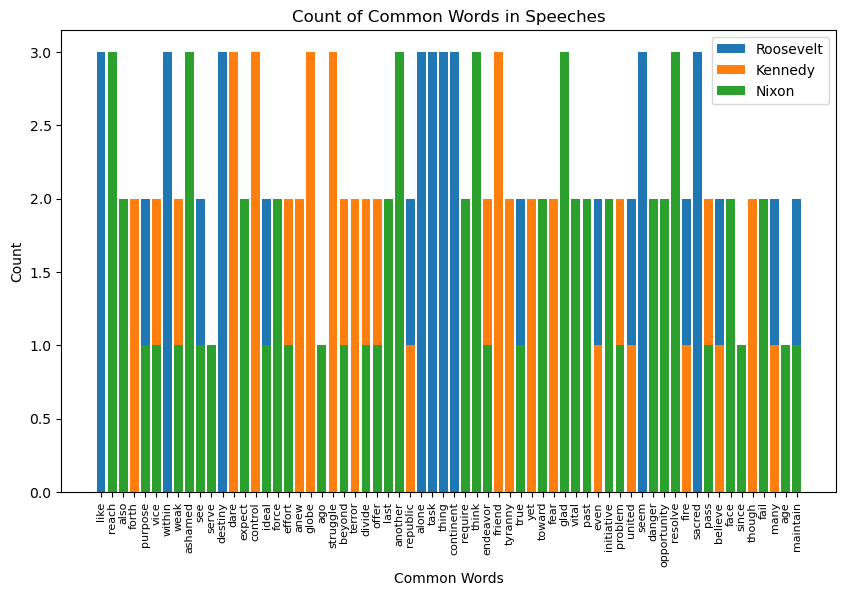

In [35]:
# Count the occurrences of common words in each speech
roosevelt_word_count = {word: roosevelt_words_lemmatized.count(word) for word in common_words}
kennedy_word_count = {word: kennedy_words_lemmatized.count(word) for word in common_words}
nixon_word_count = {word: nixon_words_lemmatized.count(word) for word in common_words}

# Print the common words and their counts in each speech
#print("Common words:")

print("Common Word counts in Roosevelt's speech:")
print(roosevelt_word_count)
print('\n')
print("Common Word counts in Kennedy's speech:")
print(kennedy_word_count)
print('\n')
print("Common Word counts in Nixon's speech:")
print(nixon_word_count)

import matplotlib.pyplot as plt

# Prepare the data for plotting
words = list(common_words)
roosevelt_counts = [roosevelt_word_count[word] for word in words]
kennedy_counts = [kennedy_word_count[word] for word in words]
nixon_counts = [nixon_word_count[word] for word in words]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(words, roosevelt_counts, label="Roosevelt")
plt.bar(words, kennedy_counts, label="Kennedy")
plt.bar(words, nixon_counts, label="Nixon")

# Add labels and title
plt.xlabel("Common Words")
plt.ylabel("Count")
plt.title("Count of Common Words in Speeches")
plt.xticks(rotation=90, fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [36]:
# Combine the filtered word lists of all speeches
all_words = roosevelt_words_lemmatized + kennedy_words_lemmatized + nixon_words_lemmatized

# Find the unique common words
common_words = set(word for word in all_words if all_words.count(word) == 3)

# Count the occurrences of common words in each speech
roosevelt_word_count = {word: roosevelt_words_lemmatized.count(word) for word in common_words}
kennedy_word_count = {word: kennedy_words_lemmatized.count(word) for word in common_words}
nixon_word_count = {word: nixon_words_lemmatized.count(word) for word in common_words}

# Create a dictionary of common words with their total counts
common_word_counts = {}
for word in common_words:
    common_word_counts[word] = roosevelt_word_count[word] + kennedy_word_count[word] + nixon_word_count[word]

# Print the dictionary of common words and their counts
for word, count in common_word_counts.items():
    print(f"{word}: {count}")


like: 3
reach: 3
also: 3
forth: 3
purpose: 3
vice: 3
within: 3
weak: 3
ashamed: 3
see: 3
serve: 3
destiny: 3
dare: 3
expect: 3
control: 3
ideal: 3
force: 3
effort: 3
anew: 3
globe: 3
ago: 3
struggle: 3
beyond: 3
terror: 3
divide: 3
offer: 3
last: 3
another: 3
republic: 3
alone: 3
task: 3
thing: 3
continent: 3
require: 3
think: 3
endeavor: 3
friend: 3
tyranny: 3
true: 3
yet: 3
toward: 3
fear: 3
glad: 3
vital: 3
past: 3
even: 3
initiative: 3
problem: 3
united: 3
seem: 3
danger: 3
opportunity: 3
resolve: 3
fire: 3
sacred: 3
pass: 3
believe: 3
face: 3
since: 3
though: 3
fail: 3
many: 3
age: 3
maintain: 3


2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)
3

In [37]:
# Create word clouds
roosevelt_wordcloud = WordCloud(width=800, height=400).generate(' '.join(roosevelt_words_lemmatized))
kennedy_wordcloud = WordCloud(width=800, height=400).generate(' '.join(kennedy_words_filtered))
nixon_wordcloud = WordCloud(width=800, height=400).generate(' '.join(nixon_words_filtered))

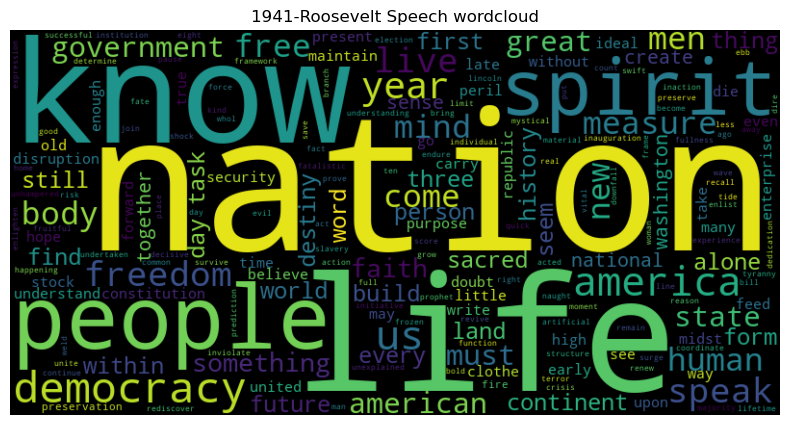

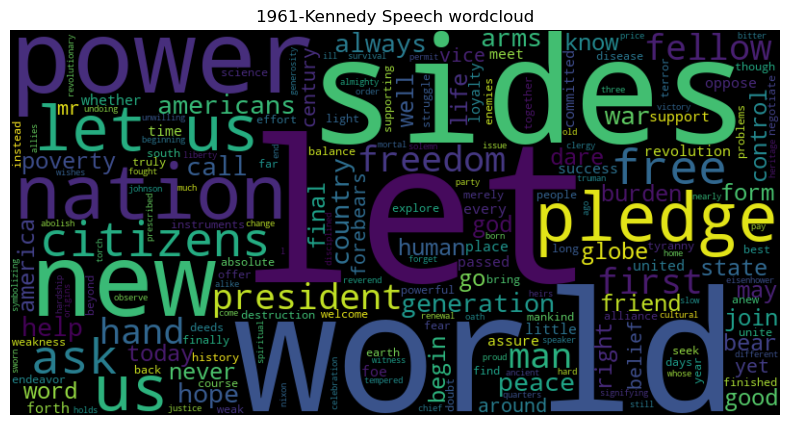

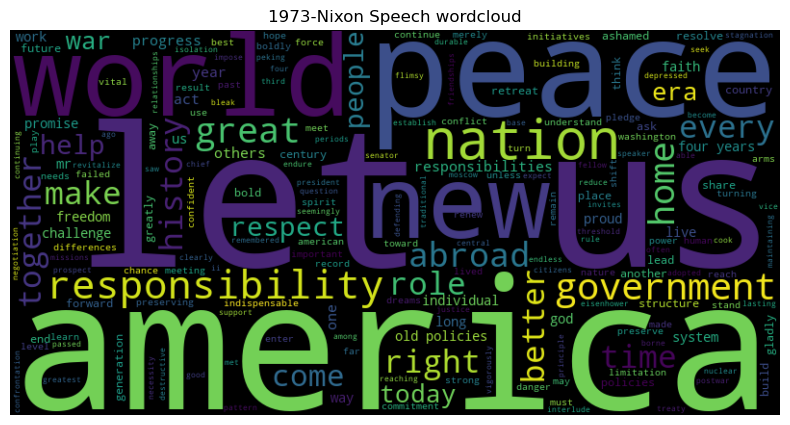

In [38]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(roosevelt_wordcloud, interpolation='bilinear')
plt.title('1941-Roosevelt Speech wordcloud')
plt.axis('off')
plt.show()
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(kennedy_wordcloud, interpolation='bilinear')
plt.title('1961-Kennedy Speech wordcloud')
plt.axis('off')
plt.show()
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(nixon_wordcloud, interpolation='bilinear')
plt.title('1973-Nixon Speech wordcloud')
plt.axis('off')
plt.show()

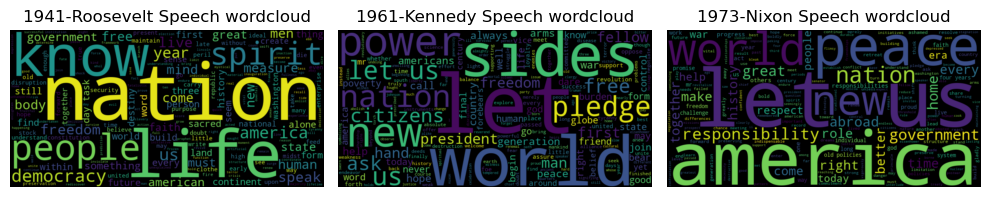

In [39]:
# Plot the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(roosevelt_wordcloud, interpolation='bilinear')
plt.title('1941-Roosevelt Speech wordcloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kennedy_wordcloud, interpolation='bilinear')
plt.title('1961-Kennedy Speech wordcloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nixon_wordcloud, interpolation='bilinear')
plt.title('1973-Nixon Speech wordcloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# Refelction Report

Please reflect on all that you learnt and fill this reflection: https://docs.google.com/forms/d/e/1FAIpQLSfqHHlmJyUkniiBiejtudIuRFk_TVCLe843wfX6Iu3QNRPmng/viewform?usp=sf_link

--End--